# Clustering using the k-Means Clustering Algorithm

| **Key**          | Value                                                                                                               |
|:-----------------|:--------------------------------------------------------------------------------------------------------------------|
| **Course Codes** | BBT 4206 and BFS 4102                                                                                               |
| **Course Names** | BBT 4206: Business Intelligence II (Week 4-6 of 13) and BFS 4102: Advanced Business Data Analytics (Week 4-6 of 13) |
| **Semester**     | April to July 2025                                                                                                  |
| **Lecturer**     | Allan Omondi                                                                                                        |
| **Contact**      | aomondi@strathmore.edu                                                                                              |
| **Note**         | The lecture contains both theory and practice. This notebook forms part of the practice.                            |

**Business context**: A business wants to group its customers into distinct segments based on demographic and spending behavior. The marketing team can then target each segment with tailored adverts.

**Dataset**: Mall Customers dataset (200 customers, features: Gender, Age, Annual Income, Spending Score).

`import pandas as pd`
- 'Pandas' is essential because it is used for:
    - Loading the CSV data (`pd.read_csv()`)
    - Data manipulation and analysis
    - Creating and managing DataFrames
    - Essential for structured data analysis, e.g., `Group By` operations

`import matplotlib.pyplot as plt`
- 'Matplotlib' is used for:
    - Visualising data
    - Plotting graphs (e.g., scatter plots, line plots, the elbow method graph)
    - Customising visualisations (labels, titles, legends)

`from sklearn.preprocessing import StandardScaler, MinMaxScaler`
- 'StandardScaler' is used for:
    - Scaling features to have a mean of 0 and standard deviation of 1
    - This **data transformation** (referred to as standardization) is necessary to ensure that all features contribute equally to the distance calculations when clustering
- 'MinMaxScaler' is used for:
    - Normalization to ensure numeric features range between 0 and 1
- One-Hot encoding is another data transformation technique that converts categorical variables into binary vectors. It is not applied in this case

`from sklearn.cluster import KMeans`
- 'KMeans' is used for:
    - Performing K-Means clustering
    - Finding clusters in the data based on the features provided
    - The `fit_predict()` method can then be used to fit the model and predict cluster labels for each data point

`import seaborn as sns`
- 'Seaborn' is used for:
    - Enhanced data visualisation
    - Creating more aesthetically pleasing and informative plots (e.g., histograms, box plots, heatmaps)
    - It provides a high-level interface for drawing attractive statistical graphics

`import warnings`
`warnings.filterwarnings('ignore')`
- 'Warnings' is used to suppress warnings that may arise during the execution of the code, such as convergence warnings from K-Means. Even though it is not necessary for the clustering, it helps keep the output clean and focused on the results.

## Step 1: Import the necessary libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

## Step 2: Load the data

In [66]:
# url = './data/mall_customers.csv'
url = 'https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining/refs/heads/main/data/mall_customers.csv'
customer_data = pd.read_csv(url)

## Step 3: Initial Exploratory Data Analysis (EDA)

In [67]:
print("\nThe data types:")
print(customer_data.info())

print("\nThe summary of the numeric columns:")
display(customer_data.describe())

print("\nThe whole dataset:")
display(customer_data)

print("\nThe first 5 rows in the dataset:")
display(customer_data.head())

print("\nPercentage distribution for each category")
print("\nNumber of observations per class:")
print("Frequency counts:\n", customer_data['Genre'].value_counts())
print("\nPercentages:\n", customer_data['Genre'].value_counts(normalize=True) * 100, "%")


The data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

The summary of the numeric columns:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



The whole dataset:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18



The first 5 rows in the dataset:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Percentage distribution for each category

Number of observations per class:
Frequency counts:
 Genre
Female    112
Male       88
Name: count, dtype: int64

Percentages:
 Genre
Female    56.0
Male      44.0
Name: proportion, dtype: float64 %


### Measures of Distribution
#### Variance of numeric columns

In [68]:
numeric_cols = customer_data.select_dtypes(include=['int64', 'float64']).columns
print("\nVariance of numeric columns:")
print(customer_data[numeric_cols].var())



Variance of numeric columns:
CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64


#### Standard deviation of numeric columns

In [69]:
print("\nStandard deviation of numeric columns:")
print(customer_data[numeric_cols].std())


Standard deviation of numeric columns:
CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64


#### Kurtosis of numeric columns

In [70]:
from scipy.stats import kurtosis

print("\nFisher Kurtosis of numeric columns:")
print("\nInterpretation:")
print("→ Positive kurtosis indicates heavier tails (more outliers) than normal distribution - leptokurtic")
print("→ Negative kurtosis indicates lighter tails (less outliers) than normal distribution - platykurtic")
print("→ Normal distribution has kurtosis of 0 - mesokurtic")
print("\nKurtosis values:")
print(customer_data[numeric_cols].apply(lambda x: kurtosis(x, fisher=True)))



Fisher Kurtosis of numeric columns:

Interpretation:
→ Positive kurtosis indicates heavier tails (more outliers) than normal distribution - leptokurtic
→ Negative kurtosis indicates lighter tails (less outliers) than normal distribution - platykurtic
→ Normal distribution has kurtosis of 0 - mesokurtic

Kurtosis values:
CustomerID               -1.200060
Age                      -0.684751
Annual Income (k$)       -0.125893
Spending Score (1-100)   -0.835958
dtype: float64


#### Skewness of numeric columns

In [71]:
from scipy.stats import skew
print("\nSkewness of numeric columns:")
print("\nInterpretation:")
print("→ Positive skewness indicates a long right tail (right-skewed distribution)")
print("→ Negative skewness indicates a long left tail (left-skewed distribution)")
print("→ Skewness close to 0 indicates a symmetric distribution")
print("\nSkewness values:")
print(customer_data[numeric_cols].apply(lambda x: skew(x)))


Skewness of numeric columns:

Interpretation:
→ Positive skewness indicates a long right tail (right-skewed distribution)
→ Negative skewness indicates a long left tail (left-skewed distribution)
→ Skewness close to 0 indicates a symmetric distribution

Skewness values:
CustomerID                0.000000
Age                       0.481919
Annual Income (k$)        0.319424
Spending Score (1-100)   -0.046865
dtype: float64


### Measures of Relationship

#### Covariance matrix of numeric features

In [72]:
print("\nCovariance matrix of numeric features:")
print("\nInterpretation:")
print("→ Positive values indicate that variables move in the same direction")
print("→ Negative values indicate that variables move in opposite directions")
print("→ Values close to 0 indicate little to no linear relationship")
print("\nCovariance values:")
print(customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].cov())



Covariance matrix of numeric features:

Interpretation:
→ Positive values indicate that variables move in the same direction
→ Negative values indicate that variables move in opposite directions
→ Values close to 0 indicate little to no linear relationship

Covariance values:
                               Age  Annual Income (k$)  Spending Score (1-100)
Age                     195.133166           -4.548744             -118.040201
Annual Income (k$)       -4.548744          689.835578                6.716583
Spending Score (1-100) -118.040201            6.716583              666.854271


#### Correlation matrix of numeric features

In [73]:
print("\nSpearman correlation matrix of numeric features:")
spearman_corr = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(method='spearman')
print("\nInterpretation:")
print("→ Values range from -1 to +1")
print("→ +1 indicates perfect positive correlation")
print("→ -1 indicates perfect negative correlation")
print("→ 0 indicates no correlation")
print("\nCorrelation values:")
print(spearman_corr)



Spearman correlation matrix of numeric features:

Interpretation:
→ Values range from -1 to +1
→ +1 indicates perfect positive correlation
→ -1 indicates perfect negative correlation
→ 0 indicates no correlation

Correlation values:
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000            0.019767                -0.34494
Annual Income (k$)      0.019767            1.000000                 0.00784
Spending Score (1-100) -0.344940            0.007840                 1.00000


### Basic visualization of the data

#### Histograms

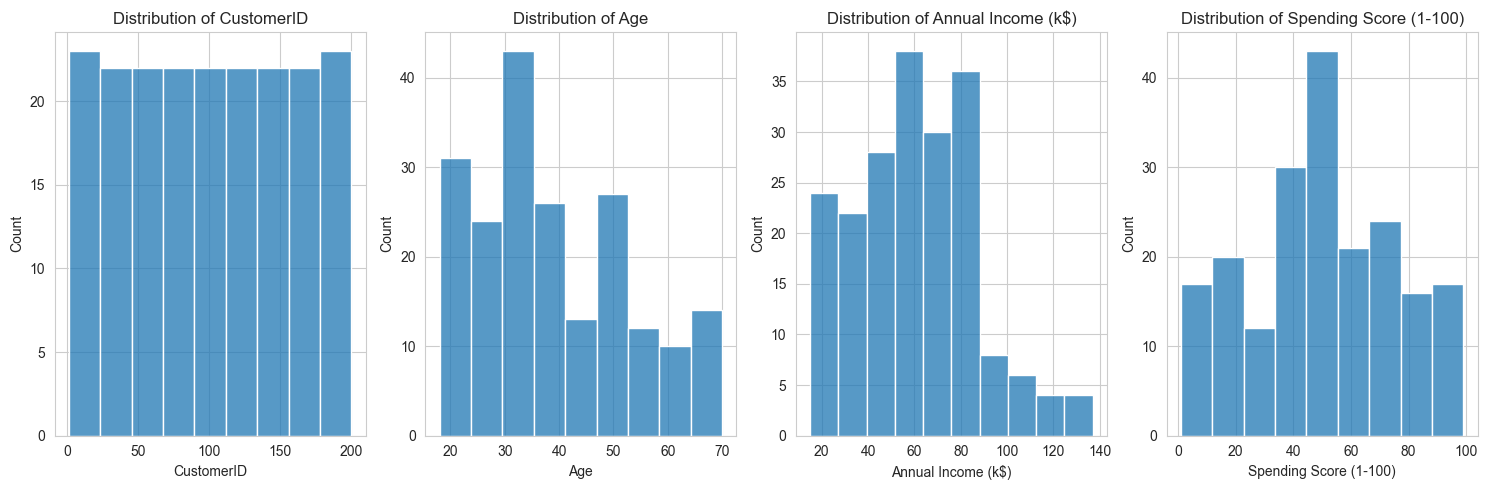

In [74]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(data=customer_data, x=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

#### Box plots

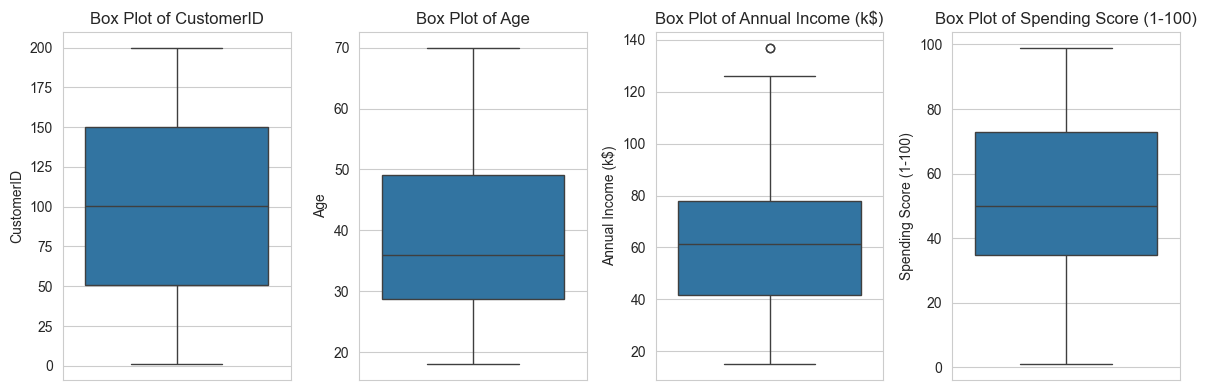

In [75]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(data=customer_data, y=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


#### Missing data plot

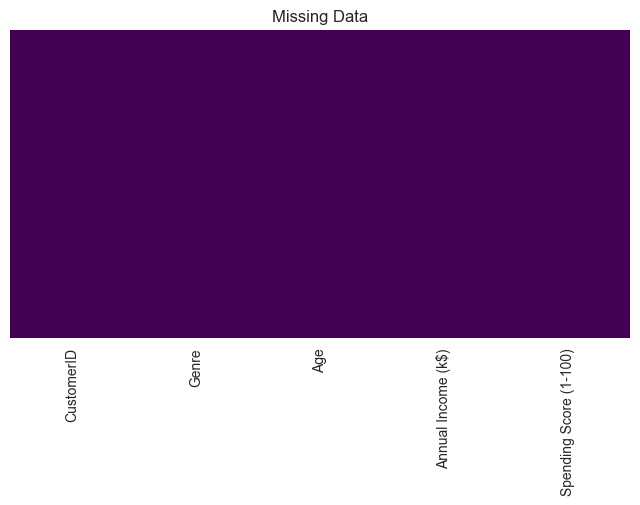

In [76]:
plt.figure(figsize=(8, 4))
sns.heatmap(customer_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')
plt.show()

#### Correlation heatmap

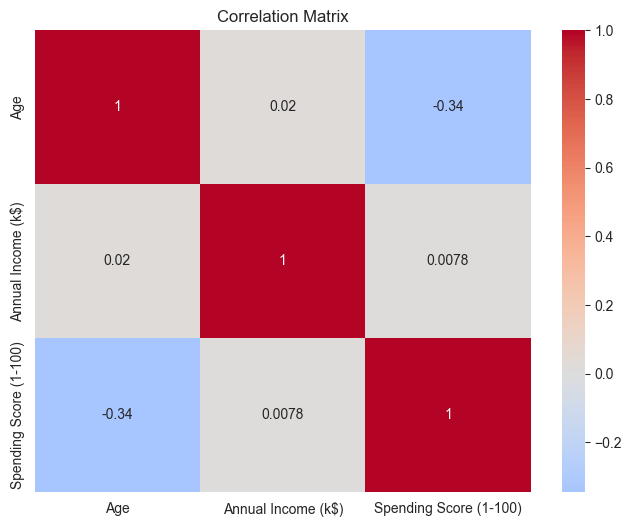

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### Scatter plot matrix

<Figure size 1000x1000 with 0 Axes>

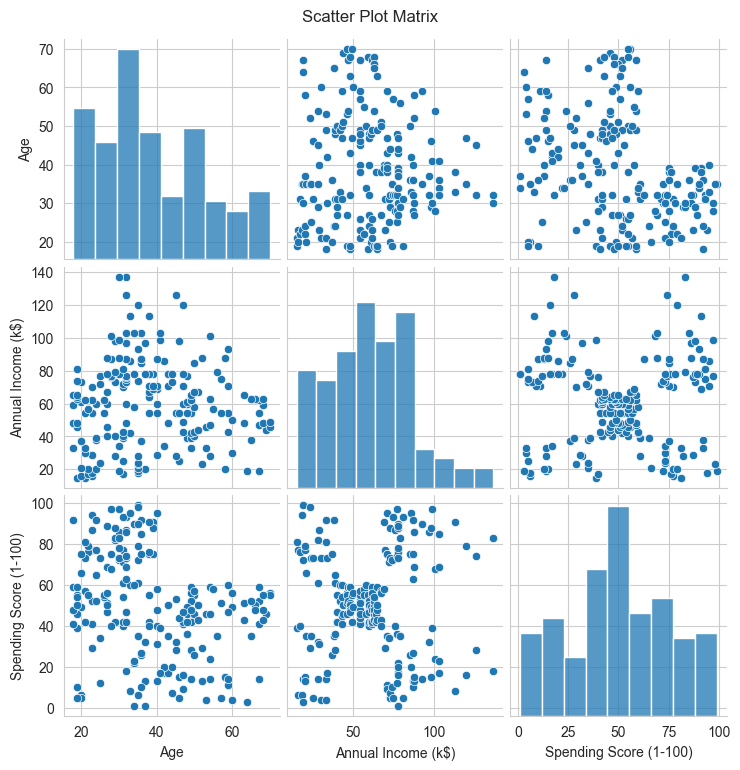

In [78]:
plt.figure(figsize=(10, 10))
sns.pairplot(customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

## Step 4: Feature selection for clustering
We will use **Age**, **Annual Income (KES)**, and **Spending Score (1‑100)**.

In [79]:
X = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Step 5: Data transformation

In [80]:
# Option 1: Standardize (mean=0, variance=1)
scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(X)
print("\nStandardized data (mean=0, variance=1):")

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nFirst 5 rows:")
display(X_scaled_df.head())
print("\nMean and standard deviation:")
display(X_scaled_df.describe())


# Option 2: Normalize (scale between 0 and 1) - this is optional for k-Means
# normalizer = MinMaxScaler()
# X_normalized = normalizer.fit_transform(X)
# print("\nNormalized data (scale between 0 and 1):")
# print(X_normalized)


Standardized data (mean=0, variance=1):

First 5 rows:


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980



Mean and standard deviation:


,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


## Step 6: Determine the optimal number of clusters using the Elbow method

1. **Inertia Calculation Loop:**
   - Creates an empty list `inertia` to store the sum of squared distances
   - Loops through k values from 1 to 10 using `range(1,11)`
   - For each k value:
     - Creates a KMeans model with k clusters
     - Fits the model to the scaled data
     - Adds the inertia (Within-Cluster Sum of Squares [WCSS]) to the list
          - **Within-Cluster Sum of Squares (WCSS)**, also known as **inertia**, measures the compactness of clusters in a clustering algorithm. It represents the sum of the squared distances between each data point in a cluster and the centroid of that cluster. A lower WCSS indicates that the data points within each cluster are closer to their respective centroid, suggesting tighter, more compact clusters.

2. **Visualization:**
   - Creates a figure of size 6x4
   - Plots k values (x-axis) against inertia values (y-axis)
   - Adds markers 'o' at each point
   - Labels axes and adds title
   - Displays the plot

3. **Purpose:**
   - The Elbow Method helps find the optimal number of clusters
   - The "elbow" in the plot indicates where adding more clusters gives diminishing returns
   - Point where the line starts to level out suggests optimal k value

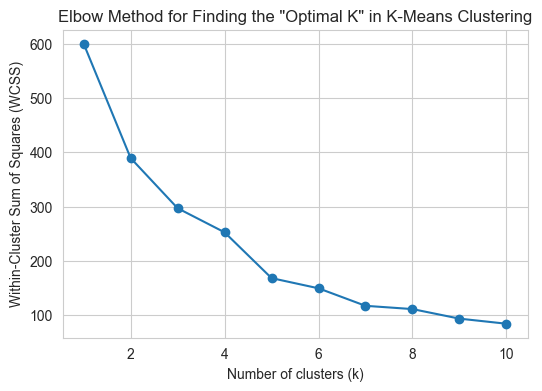

In [81]:
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=53)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Finding the \"Optimal K\" in K-Means Clustering')
plt.show()

Based on the elbow plot, **k = 5** gives the ideal number of clusters; where adding more clusters does not significantly improve tightness.

## Step 7: Apply K-Means clustering using the optimal number of clusters

In [82]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=53)
clusters = kmeans.fit_predict(X_scaled)
customer_data['Cluster'] = clusters
customer_data.head()
customer_data.to_csv('./data/mall_customers_with_clusters.csv')

## Step 8: Visualize the clusters

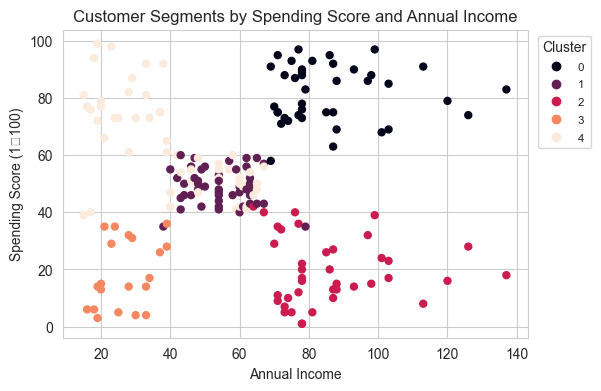

In [83]:
plt.figure(figsize=(6,4))
scatter = plt.scatter(customer_data['Annual Income (k$)'],
                      customer_data['Spending Score (1-100)'],
                      c=customer_data['Cluster'], s=25)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1‑100)')
plt.title('Customer Segments by Spending Score and Annual Income')
plt.legend(*scatter.legend_elements(), title='Cluster', loc='upper right',
           bbox_to_anchor=(1.15, 1), fontsize='small')
plt.show()

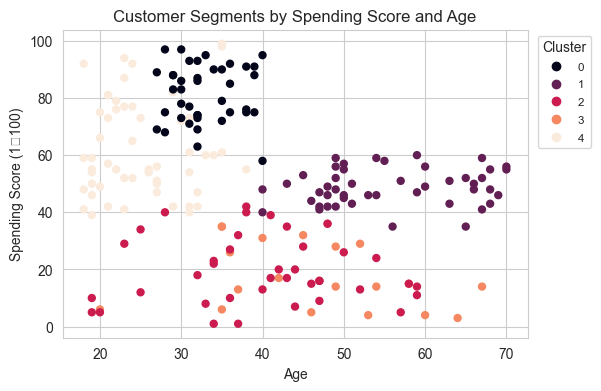

In [84]:
plt.figure(figsize=(6,4))
scatter = plt.scatter(customer_data['Age'],
                      customer_data['Spending Score (1-100)'],
                      c=customer_data['Cluster'], s=25)
plt.xlabel('Age')
plt.ylabel('Spending Score (1‑100)')
plt.title('Customer Segments by Spending Score and Age')
plt.legend(*scatter.legend_elements(), title='Cluster', loc='upper right',
           bbox_to_anchor=(1.15, 1), fontsize='small')
plt.show()

## Step 9: Interpret the clusters (customer segments in the market)

In [85]:
print("\nGender distribution by cluster:")
print(pd.crosstab(customer_data['Cluster'], customer_data['Genre']))
print("\nCluster statistics:")
print("\nMeans:")
display(customer_data.groupby('Cluster').mean(numeric_only=True))
print("\nStandard deviations:")
display(customer_data.groupby('Cluster').std(numeric_only=True))



Gender distribution by cluster:
Genre    Female  Male
Cluster              
0            22    18
1            27    20
2            19    20
3            12     8
4            32    22

Cluster statistics:

Means:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,161.025000,32.875000,86.100000,81.525000
1,83.872340,55.638298,54.382979,48.851064
2,159.743590,39.871795,86.102564,19.358974
3,24.100000,46.250000,26.750000,18.350000
4,55.648148,25.185185,41.092593,62.240741



Standard deviations:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,23.338630,3.857643,16.339036,9.999968
1,24.425234,8.913657,8.818344,6.303825
2,24.104725,10.938054,16.725013,11.610991
3,12.336936,11.579815,7.311671,11.935242
4,36.656054,5.508395,16.815613,16.596130


| Cluster | Typical age | Gender | Income level | Spending Behaviour |
|---------|-------------|--------|--------------|--------------------|
| 0       | Young       | Both   | Low–medium   | Frugal             |
| 1       | Young       | Both   | High         | Luxury shoppers    |
| 2       | Mature      | Both   | High         | Targeted premium   |
| 3       | Mature      | Female | Low          | Low spenders       |
| 4       | Middle‑age  | Both   | Medium       | Average spend      |